# 8x8=16bit (CSR)

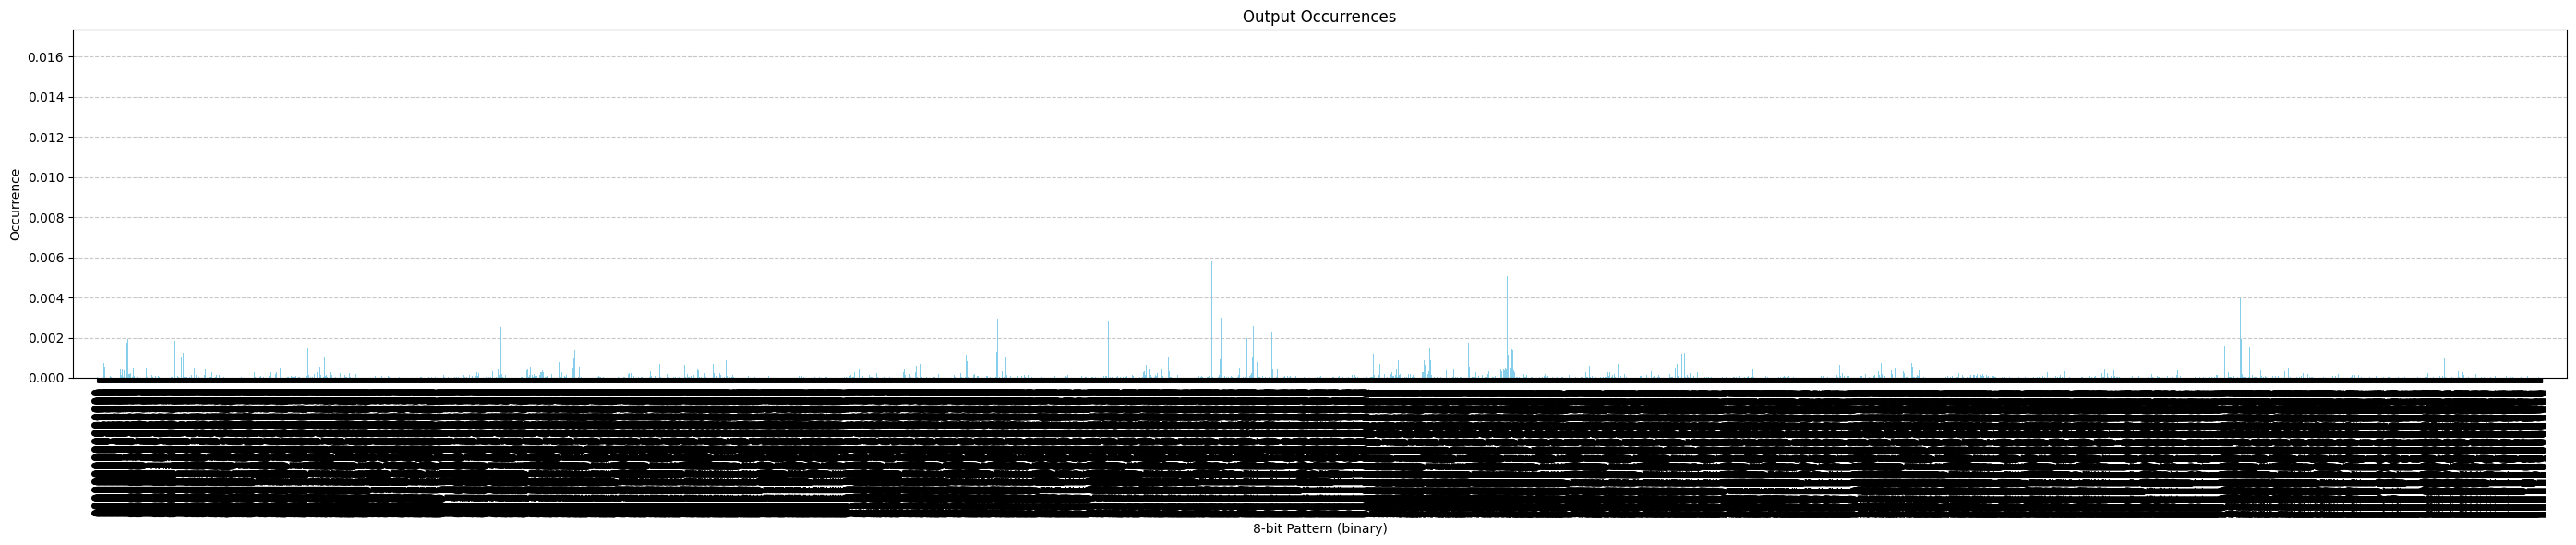

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("8x8_16b_CSR_UniqueOccurrences.csv", low_memory=False, dtype={'Pattern': str})
# print(df)
# print(df.head())
# print(df.info())
# Create a bar plot using the "Pattern" as the x-axis and "Occurrence" as the y-axis.
plt.figure(figsize=(28, 6))
plt.bar(df["Pattern"], df["Occurrence"]/df["Occurrence"].sum(), color='skyblue')
plt.xlabel("8-bit Pattern (binary)")
plt.ylabel("Occurrence")
plt.title("Output Occurrences")
plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 8x8=8b (CSR)

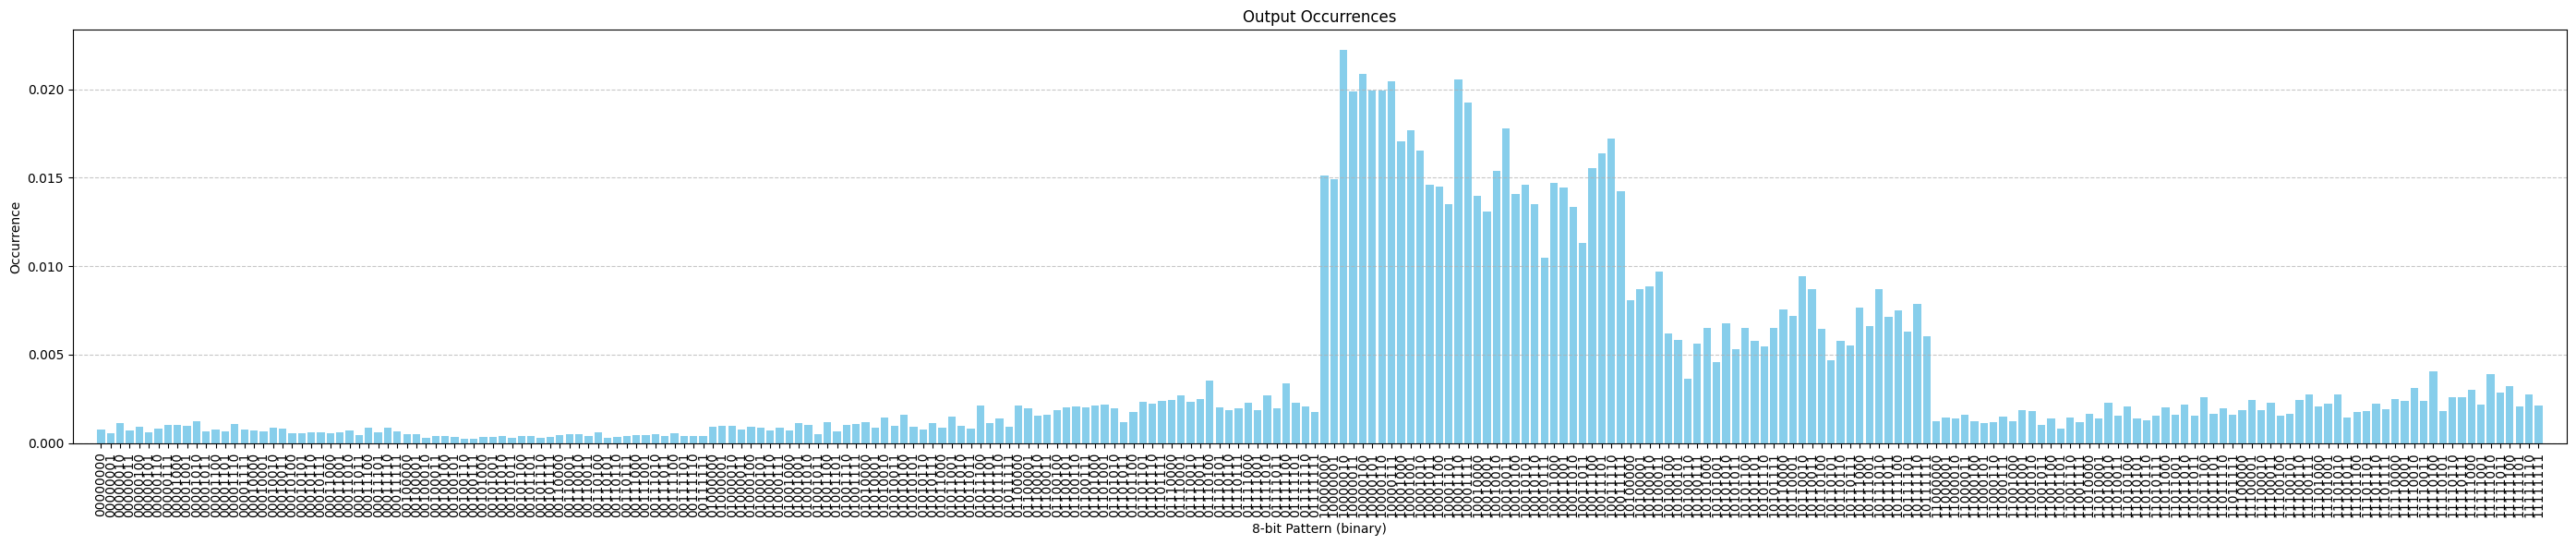

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("8bIntFac_UniqueOccurrences.csv", low_memory=False, dtype={'Pattern': str})
# print(df)
# print(df.head())
# print(df.info())
# Create a bar plot using the "Pattern" as the x-axis and "Occurrence" as the y-axis.
plt.figure(figsize=(28, 6))
plt.bar(df["Pattern"], df["Occurrence"]/df["Occurrence"].sum(), color='skyblue')
plt.xlabel("8-bit Pattern (binary)")
plt.ylabel("Occurrence")
plt.title("Output Occurrences")
plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("UniqueOccurrences.csv", low_memory=False, dtype={'Pattern': str})
print(df)
print(df.head())
print(df.info())
# Create a bar plot using the "Pattern" as the x-axis and "Occurrence" as the y-axis.
plt.figure(figsize=(28, 6))
plt.bar(df["Pattern"], df["Occurrence"]/df["Occurrence"].sum(), color='skyblue')
plt.xlabel("8-bit Pattern (binary)")
plt.ylabel("Occurrence")
plt.title("Output Occurrences")
plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


                Pattern  Occurrence
0      0000000000000011           1
1      0000000000001101           1
2      0000000000010111           1
3      0000000000011000           1
4      0000000000011111           1
...                 ...         ...
21878  1111111111111001           2
21879  1111111111111011           4
21880  1111111111111100           4
21881  1111111111111101           1
21882  1111111111111110           1

[21883 rows x 2 columns]
            Pattern  Occurrence
0  0000000000000011           1
1  0000000000001101           1
2  0000000000010111           1
3  0000000000011000           1
4  0000000000011111           1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21883 entries, 0 to 21882
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pattern     21883 non-null  object
 1   Occurrence  21883 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 342.0+ KB
None


KeyboardInterrupt: 

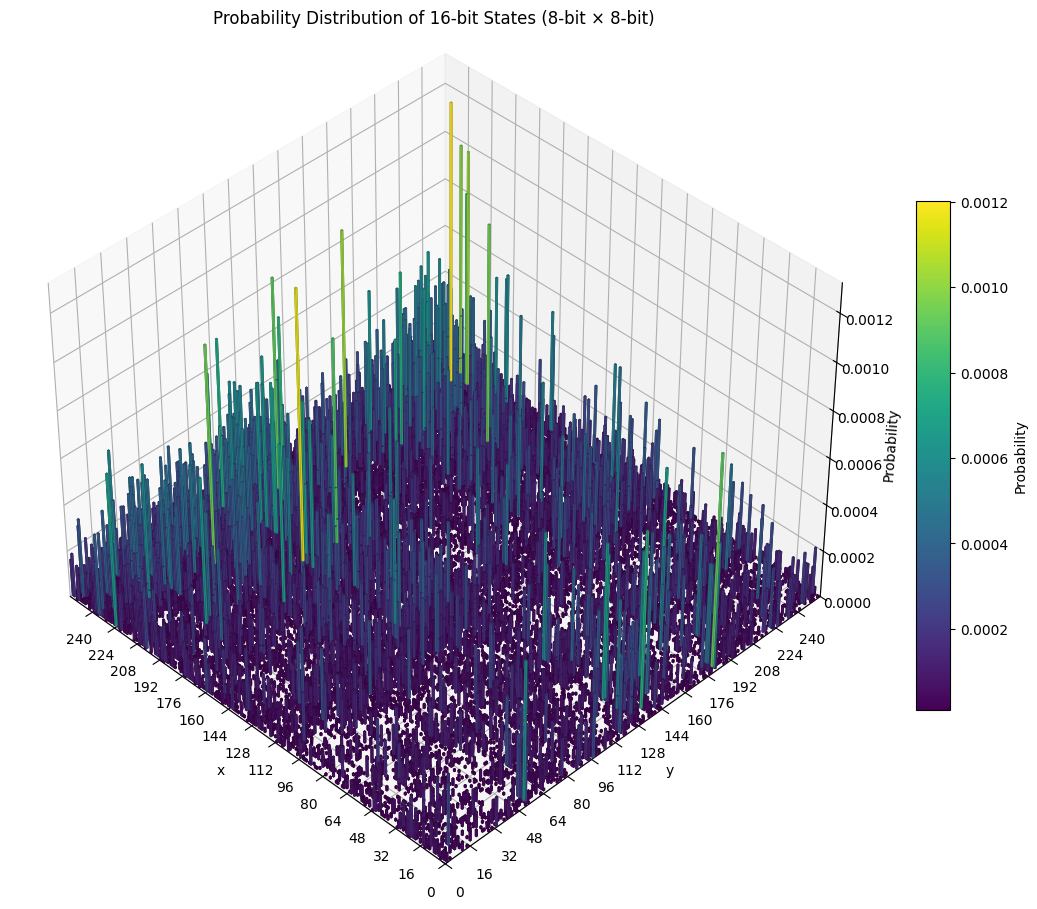

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Load your CSV
df = pd.read_csv("UniqueOccurrences.csv", dtype={'Pattern': str})

# Normalize to probability
df["Probability"] = df["Occurrence"] / df["Occurrence"].sum()

# Split 16-bit pattern: first 8 bits = y, last 8 bits = x
def pattern_to_coords(pattern):
    y = int(pattern[:8], 2)  # MSB = y
    x = int(pattern[8:], 2)  # LSB = x
    return x, y

df[["x", "y"]] = df["Pattern"].apply(lambda p: pd.Series(pattern_to_coords(p)))

# Data for 3D bar plot
x = df["x"]
y = df["y"]
z = np.zeros_like(x)
dx = dy = 1  # width of each bar
dz = df["Probability"]

# Normalize dz to [0,1] for color mapping
norm = plt.Normalize(dz.min(), dz.max())
colors = cm.viridis(norm(dz))

# Plotting
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x, y, z, dx, dy, dz, color=colors, shade=True)

# Labeling
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Probability")
ax.set_title("Probability Distribution of 16-bit States (8-bit × 8-bit)")

# Flip x-axis: from 225 → 0
ax.set_xlim(256, 0)
# Keep y-axis: from 0 → 225
ax.set_ylim(0, 256)

# Optional: ticks every 32 to reduce clutter
ax.set_xticks(np.arange(0, 256, 16))
ax.set_yticks(np.arange(0, 256, 16))
ax.set_zlim(0, max(dz)*1.1)
ax.view_init(elev=40, azim=-45)  # Adjust view angle

# Add colorbar for reference
mappable = cm.ScalarMappable(cmap="viridis", norm=norm)
mappable.set_array(dz)  # this line is important
fig.colorbar(mappable, ax=ax, shrink=0.6, aspect=15, label='Probability')

plt.tight_layout()
plt.show()
